## Time Series

This section shows some tools to work with datetime and time series. 

![](../img/datetime.png)

### datefinder: Automatically Find Dates and Time in a Python String

In [ ]:
!pip install datefinder

If you want to automatically find date and time with different formats in a Python string, try datefinder. 

In [17]:
from datefinder import find_dates

text = """"We have one meeting on May 17th, 2021 at 9:00am 
and another meeting on 5/18/2021 at 10:00. 
I hope you can attend one of the meetings."""

matches = find_dates(text)

for match in matches:
    print("Date and time:", match)
    print("Only day:", match.day)

Date and time: 2021-05-17 09:00:00
Only day: 17
Date and time: 2021-05-18 10:00:00
Only day: 18


[Link to datefinder](https://github.com/akoumjian/datefinder).



### Fastai's add_datepart: Add Relevant DateTime Features in One Line of Code

In [ ]:
!pip install fastai

When working with time series, other features such as year, month, week, day of the week, day of the year, whether it is the end of the year or not, can be really helpful to predict future events. Is there a way that you can get all of those features in one line of code?

Fastai’s add_datepart method allows you to do exactly that. 

In [41]:
import pandas as pd
from fastai.tabular.core import add_datepart
from datetime import datetime

df = pd.DataFrame(
    {
        "date": [
            datetime(2020, 2, 5),
            datetime(2020, 2, 6),
            datetime(2020, 2, 7),
            datetime(2020, 2, 8),
        ],
        "val": [1, 2, 3, 4],
    }
)

df

,date,val
0,2020-02-05,1
1,2020-02-06,2
2,2020-02-07,3
3,2020-02-08,4


<IPython.core.display.Javascript object>

In [42]:
df = add_datepart(df, "date")
df.columns

Index(['val', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Elapsed'],
      dtype='object')

<IPython.core.display.Javascript object>

[Link to Fastai's methods to work with tabular data](https://docs.fast.ai/tabular.core.html)

### Maya: Convert the string to datetime automatically

In [ ]:
!pip install maya

If you want to convert a string type to a datetime type, the common way is to use `strptime(date_string, format)`. But it is quite inconvenient to specify the structure of your datetime string, such as ‘ %Y-%m-%d %H:%M:%S’.

There is a tool that helps you convert the string to datetime automatically called maya. You just need to parse the string and maya will figure out the structure of your string.

In [49]:
import maya

# Automatically parse datetime string
string = "2016-12-16 18:23:45.423992+00:00"
maya.parse(string).datetime()

datetime.datetime(2016, 12, 16, 18, 23, 45, 423992, tzinfo=<UTC>)

<IPython.core.display.Javascript object>

Better yet, if you want to convert the string to a different time zone (for example, CST), you can parse that into maya’s datetime function.

In [50]:
maya.parse(string).datetime(to_timezone="US/Central")

datetime.datetime(2016, 12, 16, 12, 23, 45, 423992, tzinfo=<DstTzInfo 'US/Central' CST-1 day, 18:00:00 STD>)

<IPython.core.display.Javascript object>

[Link to maya](https://github.com/timofurrer/maya).

### traces: A Python Library for Unevenly-Spaced Time Series Analysis


In [ ]:
!pip install traces

If you are working with unevenly-spaced time series, try traces. traces allows you to get the values of the datetimes not specified in your time series based on the values of other datetimes.  

For example, while logging our working hours for each date, we forgot to log the working hours for some dates.

In [21]:
# Log working hours for each date
import traces 
from datetime import datetime 

working_hours = traces.TimeSeries()
working_hours[datetime(2021, 9, 10)] = 10
working_hours[datetime(2021, 9, 12)] = 5
working_hours[datetime(2021, 9, 13)] = 6
working_hours[datetime(2021, 9, 16)] = 2

We can get the working hours of dates we forgot to log using traces.

In [22]:
# Get value on 2021/09/11
working_hours[datetime(2021, 9, 11)]

10

In [23]:
# Get value on 2021/09/14
working_hours[datetime(2021, 9, 14)]

6

We can also get the distribution of our working hours from `2021-9-10` to `2021-9-16` using `distribution`:

In [24]:
distribution = working_hours.distribution(
    start=datetime(2021, 9, 10),
    end=datetime(2021, 9, 16)
)
distribution

Histogram({5: 0.16666666666666666, 6: 0.5, 10: 0.3333333333333333})

From the output above, it seems like we work 6 hours per day 50% of the time.

Get the median working hours:

In [25]:
distribution.median()

6.0

Get the mean working hours:

In [26]:
distribution.mean()

7.166666666666666

[Link to traces](https://github.com/datascopeanalytics/traces)

### Extract holiday from date column

In [ ]:
!pip install holidays

You have a date column and you think the holidays might affect the target of your data. Is there an easy way to extract the holidays from the date? That is when holidays package comes in handy.

Holidays package provides a dictionary of holidays for different countries. The code below is to confirm whether 2020-07-04 is a US holiday and extract the name of the holiday.

In [52]:
from datetime import date
import holidays

us_holidays = holidays.UnitedStates()

"2014-07-04" in us_holidays

True

<IPython.core.display.Javascript object>

The great thing about this package is that you can write the date in whatever way you want and the package is still able to detect which date you are talking about.

In [53]:
us_holidays.get("2014-7-4")

'Independence Day'

<IPython.core.display.Javascript object>

In [54]:
us_holidays.get("2014/7/4")

'Independence Day'

<IPython.core.display.Javascript object>

[Link to holidays](https://pypi.org/project/holidays/).

### Workalendar: Handle Working-Day Computation in Python  

In [ ]:
!pip install workalendar

If you want to handle calendars, holidays, and working-day-related computations, use Workalendar. Workalendar supports nearly 100 countries over the world. 

In [9]:
from datetime import date 
from workalendar.usa import UnitedStates
from workalendar.asia import Japan

In [10]:
# Get all holidays in the US

US_cal = UnitedStates()
US_cal.holidays(2022)

[(datetime.date(2021, 12, 31), 'New year (Observed)'),
 (datetime.date(2022, 1, 1), 'New year'),
 (datetime.date(2022, 1, 17), 'Birthday of Martin Luther King, Jr.'),
 (datetime.date(2022, 2, 21), "Washington's Birthday"),
 (datetime.date(2022, 5, 30), 'Memorial Day'),
 (datetime.date(2022, 7, 4), 'Independence Day'),
 (datetime.date(2022, 9, 5), 'Labor Day'),
 (datetime.date(2022, 10, 10), 'Columbus Day'),
 (datetime.date(2022, 11, 11), 'Veterans Day'),
 (datetime.date(2022, 11, 24), 'Thanksgiving Day'),
 (datetime.date(2022, 12, 25), 'Christmas Day'),
 (datetime.date(2022, 12, 26), 'Christmas Day (Observed)')]

In [11]:
US_cal.is_working_day(date(2022, 1, 22)) # Saturday

False

In [12]:
US_cal.is_working_day(date(2021, 12, 24)) # Thanksgiving Day

False

In [14]:
# Calculate working days between 2022/1/19 and 2022/5/15
US_cal.get_working_days_delta(date(2022, 1, 19), date(2022, 5, 15))

81

In [13]:
# Get holidays in Japan
JA_cal = Japan()
JA_cal.holidays(2022)

[(datetime.date(2022, 1, 1), 'New year'),
 (datetime.date(2022, 1, 10), 'Coming of Age Day'),
 (datetime.date(2022, 2, 11), 'Foundation Day'),
 (datetime.date(2022, 2, 23), "The Emperor's Birthday"),
 (datetime.date(2022, 3, 21), 'Vernal Equinox Day'),
 (datetime.date(2022, 4, 29), 'Showa Day'),
 (datetime.date(2022, 5, 3), 'Constitution Memorial Day'),
 (datetime.date(2022, 5, 4), 'Greenery Day'),
 (datetime.date(2022, 5, 5), "Children's Day"),
 (datetime.date(2022, 7, 18), 'Marine Day'),
 (datetime.date(2022, 8, 11), 'Mountain Day'),
 (datetime.date(2022, 9, 19), 'Respect-for-the-Aged Day'),
 (datetime.date(2022, 9, 23), 'Autumnal Equinox Day'),
 (datetime.date(2022, 10, 10), 'Sports Day'),
 (datetime.date(2022, 11, 3), 'Culture Day'),
 (datetime.date(2022, 11, 23), 'Labour Thanksgiving Day')]

[Link to Workalendar](https://github.com/workalendar/workalendar).

### Pmdarima: Harness R's auto.arima Power with a scikit-learn-Like Interface

In [ ]:
!pip install pmdarima

To achieve functionality similar to R's `auto.arima` within a scikit-learn-like interface, use Pmdarima.

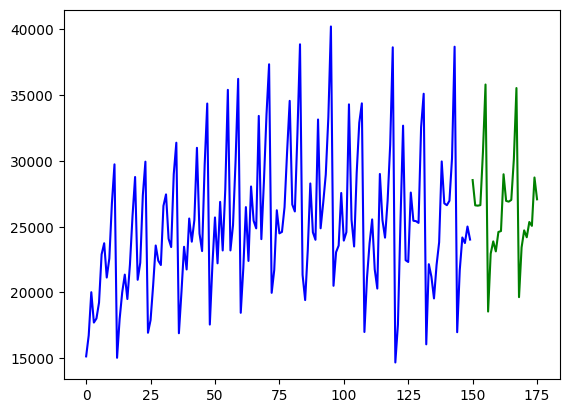

In [2]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data
y = pm.datasets.load_wineind()
train, test = train_test_split(y, train_size=150)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

# Make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c="blue")
plt.plot(x[150:], forecasts, c="green")
plt.show()


Fitting a more complex pipeline on the sunspots dataset, serializing it, and then loading it from disk to make predictions:

In [3]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

# Load/split your data
y = pm.datasets.load_sunspots()
train, test = train_test_split(y, train_size=2700)

# Define and fit your pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

pipeline.fit(train)

# Serialize your model just like you would in scikit:
with open('model.pkl', 'wb') as pkl:
    pickle.dump(pipeline, pkl)
    
# Load it and make predictions seamlessly:
with open('model.pkl', 'rb') as pkl:
    mod = pickle.load(pkl)
    print(mod.predict(15))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=6.52 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10383.210, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=10020.218, Time=0.80 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=9831.422, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10381.212, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=9830.357, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=9831.459, Time=0.70 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=9831.930, Time=3.67 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=9817.480, Time=0.22 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=9817.508, Time=1.15 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=9817.413, Time=2.34 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=9817.657, Time=3.29 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=9817.996, Time=4.25 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=9820.047, Time=4.23 sec
 ARIMA(1,1,0)(0,0,1)[

[Link to Pmdarima](https://github.com/alkaline-ml/pmdarima).

### aeon: The Ultimate Library for Time-Series Forecasting and Classification

In [ ]:
!pip install aeon

aeon is a library for time-series data that is compatible with scikit-learn and offers a variety of advanced algorithms for learning tasks like forecasting and classification.

In [4]:
import pandas as pd
from aeon.forecasting.trend import TrendForecaster

y = pd.Series([20.0, 40.0, 60.0, 80.0, 100.0])
forecaster = TrendForecaster()

# fit the forecaster
forecaster.fit(y)  

# forecast the next 3 values
forecaster.predict(fh=[1, 2, 3])  

5    120.0
6    140.0
7    160.0
dtype: float64

In [26]:
import numpy as np
from aeon.classification.distance_based import KNeighborsTimeSeriesClassifier

# 3 samples and 6 time steps 
X =  np.array([[1, 2, 3, 4, 5, 5], [1, 2, 3, 4, 4, 2], [8, 7, 6, 5, 4, 4]])

# class labels for each sample
y = np.array(["low", "low", "high"])

# Define the classifier
clf = KNeighborsTimeSeriesClassifier(distance="dtw")

# fit the classifier on train data
clf.fit(X, y)

# Test data
X_test = np.array([[2, 2, 2, 2, 2, 2], [6, 6, 6, 6, 6, 6]])

# Make class predictions on new data
y_pred = clf.predict(X_test)
y_pred

array(['low', 'high'], dtype='<U4')

[Link to aeon](https://github.com/aeon-toolkit/aeon).

### Ruptures: Detecting Change Points in Non-Stationary Signals

In [ ]:
!pip install ruptures

Use ruptures to detect change points from non-stationary signals such as trend, seasonality, and variance.

With change points, you can detect anomalies or deviations from the expected behavior and gain insights into when these transitions occur.

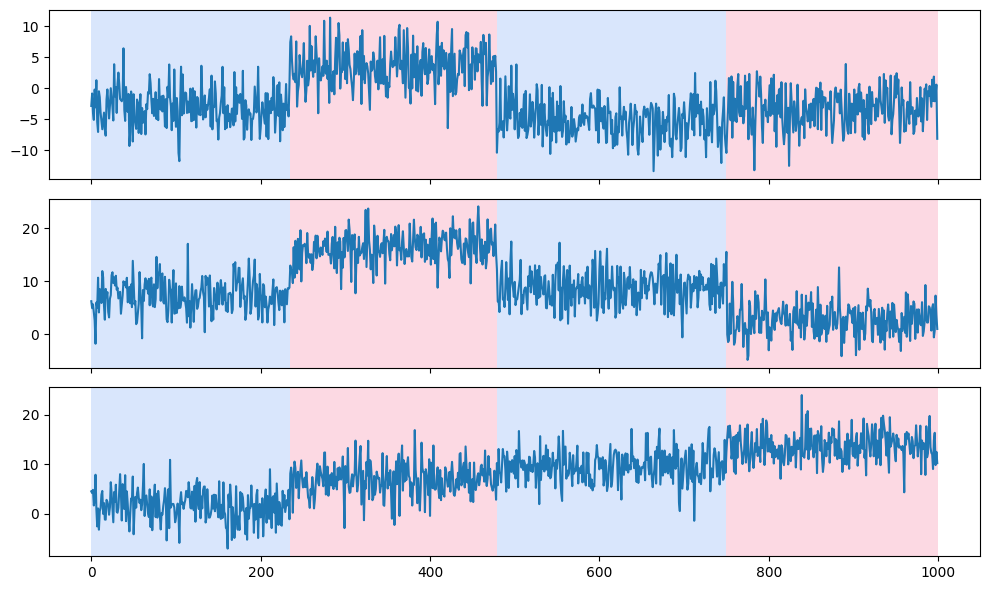

In [13]:
import matplotlib.pyplot as plt
import ruptures as rpt

# generate signal
n_samples, n_features, sigma = 1000, 3, 3
num_breakpoints = 3
signal, true_breakpoints = rpt.pw_constant(
    n_samples, n_features, num_breakpoints, noise_std=sigma
)

# detection
algo = rpt.Pelt(model="rbf").fit(signal)
predicted_breakpoints = algo.predict(pen=10)

# display
rpt.display(signal, predicted_breakpoints)
plt.show()

[Link to ruptures](https://github.com/deepcharles/ruptures).